# 17. 시냅스 가중치 적용하기

tf.keras.layers 모듈의 모든 레이어는 set_weights()메서드를 포함합니다.

set_weights()메서드를 이용해서 미리 생성, 가공하거나, 불러온 가중치 값(weights)들을 모델에 적용할 수 있습니다.

아래 예제에서는 임의의 가중치 값을 갖는 NumPy 어레이를 생성하고 모델에 적용해보겠습니다.

# 예제

In [1]:
import numpy as np
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 웨이트 생성하기
weight0 = np.random.rand(784, 512) * 0.1
weight1 = np.zeros(512)
weight2 = np.random.rand(512, 10) * 0.05
weight3 = np.zeros(10)

weights = np.array([weight0, weight1, weight2, weight3])

# 5.웨이트 적용하기
model.set_weights(weights)

print(model.get_weights())

생성한 가중치 값들이 모델에 적용됩니다.

## 설명

In [ ]:
# 4. 웨이트 생성하기
weight0 = np.random.rand(784, 512) * 0.1
weight1 = np.zeros(512)
weight2 = np.random.rand(512, 10) * 0.05
weight3 = np.zeros(10)

weights = np.array([weight0, weight1, weight2, weight3])

각 레이어별로 적용할 가중치 값과 바이어스 값을 각각의 어레이로 만들었습니다.

NumPy의 random.rand()함수를 이용해서

첫번째 레이어의 가중치 값은 0에서 0.1사이의 임의의 값을 갖도록,

두번째 레이어의 가중치 값은 0에서 0.05 사이의 임의의 값을 갖도록 만들어 주었습니다.

또한 NumPy의 zeros()함수를 이용해서 바이어스 값은 모두 0으로 합니다.

그리고 네 개의 어레이를 하나의 NumPy 어레이로 합쳐 주었습니다.

In [ ]:
# 5. 웨이트 적용하기
model.set_weights(weights)

이제 set_weights()를 이용해서 생성한 weights를 모델에 적용해줍니다.

In [ ]:
print(model.get_weights())

시냅스 가중치 얻기 페이지에서 다루었던 get_weights() 메서드를 이용해서 모델의 가중치 값을 출력해보면

생성한 가중치 값들이 적용되어 있음을 알 수 있습니다.

## 바이어스 사용하지 않기

In [2]:
import numpy as np
import tensorflow as tf

# 1 MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, use_bias = False), #바이어스 사용하지 않기, use_bias = False
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias = False)
])

weights = model.get_weights()

print(weights)
print(len(weights))
print(weights[0].shape)
print(weights[1].shape)

11501568/11490434 [==============================] - 0s 0us/step
[array([[ 0.02788258, -0.06246598, -0.00531098, ...,  0.01288572,
        -0.01710593, -0.03326653],
       [-0.04480006, -0.00312543,  0.00170244, ...,  0.0453319 ,
        -0.05406794,  0.03202682],
       [ 0.05840707,  0.06774625, -0.02338541, ..., -0.06071645,
        -0.03155698,  0.00169101],
       ...,
       [ 0.04310898,  0.0088537 , -0.04799803, ..., -0.03549021,
         0.01976594,  0.06615664],
       [-0.01409343, -0.0587365 , -0.00168154, ...,  0.05957684,
        -0.02314982,  0.06765398],
       [-0.02522045,  0.00246575,  0.01155356, ...,  0.0295435 ,
        -0.02156535,  0.04991223]], dtype=float32), array([[-0.10234541, -0.06233354, -0.07260426, ...,  0.0887197 ,
        -0.04541019,  0.09156405],
       [-0.01177541, -0.0913982 ,  0.0510511 , ..., -0.10291555,
         0.09037573,  0.01474165],
       [-0.05591973,  0.00511157, -0.06244902, ..., -0.10053698,
        -0.10530378,  0.09425377],
     

각 레이어를 구성할 때, use_bias=False로 설정하면 바이어스를 나타내는 NumPy 어레이가 생성되지 않습니다.

모델의 시냅스 가중치를 출력해보면 (784, 512)와 (512, 10)형태의 두 개의 NumPy 어레이가 생성되었음을 알 수 있습니다.

## tf.keras.initalizers.RandomNormal 사용하기

tf.keras.initializers.RandomNormal는 표준분포를 갖는 텐서(tensor)를 생성합니다.


[array([[2.0357292, 2.0138893, 2.0196948, ..., 2.0330918, 1.9829334,
        1.8935621],
       [1.9867274, 1.9355361, 2.0034418, ..., 1.9236127, 2.016306 ,
        1.9944457],
       [1.9519284, 2.0236084, 2.069694 , ..., 2.0694642, 1.9868551,
        2.038374 ],
       ...,
       [2.097893 , 1.9217156, 1.9746457, ..., 2.0250769, 1.9854388,
        1.9992251],
       [2.0055432, 2.0310793, 1.9320983, ..., 1.9783545, 2.0673463,
        2.1392934],
       [2.0106566, 2.0669436, 1.9724635, ..., 2.0321174, 2.006657 ,
        1.9629525]], dtype=float32), array([[-2.0209136, -2.0044339, -1.9774593, ..., -2.017154 , -1.9966458,
        -1.9965818],
       [-2.0045578, -2.0116045, -1.9935712, ..., -1.9853144, -2.0030186,
        -2.000123 ],
       [-2.0074625, -2.0082202, -2.013038 , ..., -1.9861165, -1.9999143,
        -1.9973581],
       ...,
       [-2.0318348, -2.003012 , -1.9964797, ..., -2.0024436, -1.9986839,
        -1.9955832],
       [-1.9990256, -1.9952036, -1.999667 , ..., -2.00

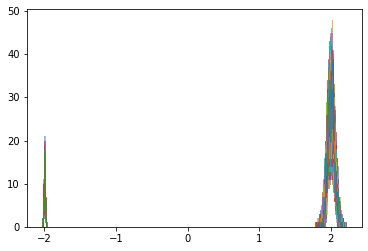

In [4]:
import numpy as np
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255, x_test/255

# 3. tf.keras.initializers.RandomNormal 사용하기
initializer1 = tf.keras.initializers.RandomNormal(mean=2.0, stddev = 0.05, seed=None)
initializer2 = tf.keras.initializers.RandomNormal(mean=-2.0, stddev = 0.01, seed=None)

# 4. 모델 구성
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, use_bias=False, kernel_initializer=initializer1),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=False, kernel_initializer=initializer2)
])

# 5. 시냅스 가중치 출력
weights = model.get_weights()
print(weights)

# 6. Matplotlib 시각화하기
import matplotlib.pyplot as plt

plt.hist(weights[0], bins =100, alpha=0.7, histtype='step')
plt.hist(weights[1], bins =100, alpha=0.7, histtype='step')
plt.show()

tf.keras.layer 모듈의 각 레이어를 구성하면서 kernel_initializer 인자를 사용해서 미리 생성한 표준분포를 갖는 텐서를 모델의 시냅스 가중치로 적용했습니다.


각각 평균 2.0, 표준편차 0.05, 평균 -2.0, 표준편차 0.01인 시냅스 가중치 값들이 생성되었음을 알 수 있습니다.

## tf.keras.initializers.RandomUniform 사용하기

tf.keras.initializers.RandomUniform은 균등 분포를 갖는 텐서(tensor)를 생성합니다.

[array([[-0.02845371, -0.00235624, -0.04058757, ..., -0.02665004,
         0.0016606 ,  0.04535959],
       [ 0.02834967,  0.01743938, -0.03233665, ..., -0.02069018,
         0.01227316,  0.04734084],
       [-0.03753493, -0.00327772,  0.02946335, ..., -0.04643693,
         0.02895376, -0.02398959],
       ...,
       [ 0.02884579, -0.03608732,  0.00675255, ..., -0.00098662,
        -0.01592517, -0.03921781],
       [-0.02264261,  0.00839329, -0.04437039, ..., -0.00689074,
         0.01555354, -0.02624738],
       [-0.02861528, -0.03431567,  0.01352957, ..., -0.03131169,
        -0.03550588, -0.00487455]], dtype=float32), array([[ 0.07395595,  0.06206553, -0.01214214, ...,  0.06057454,
         0.02471578,  0.01704166],
       [-0.01170973, -0.04651206, -0.08336425, ..., -0.0019114 ,
        -0.09385762, -0.08993602],
       [-0.04181073, -0.04647634, -0.03752084, ...,  0.09967909,
         0.0128175 , -0.03857293],
       ...,
       [ 0.0493455 ,  0.02179442, -0.07925615, ..., -0.044

(array([[ 3.,  6.,  6.,  3.,  2.,  4.,  6.,  2.,  5.,  2.,  1.,  6.,  2.,
          5.,  3.,  4.,  2., 10., 12.,  1.,  3.,  2., 13.,  3.,  5.,  6.,
          6.,  7.,  6.,  7.,  6.,  6.,  8.,  4.,  7.,  2.,  5.,  6.,  6.,
          7.,  7.,  3.,  3.,  2.,  6.,  6., 10.,  2.,  6.,  3.,  2.,  4.,
          4.,  8.,  6.,  4.,  7.,  4.,  6.,  5.,  5.,  3.,  8.,  7.,  4.,
          6.,  8.,  7.,  6.,  7.,  3.,  3.,  6.,  5.,  6.,  6.,  5.,  5.,
          4.,  7.,  8.,  4.,  5.,  4.,  7.,  3.,  2.,  3.,  2., 10.,  5.,
          9.,  4.,  4.,  4.,  7.,  3.,  4.,  6.,  9.],
        [ 4.,  7.,  6., 12.,  2.,  6.,  6.,  4.,  4.,  6.,  4.,  5.,  7.,
          8.,  4., 12.,  3.,  3.,  7.,  5.,  3.,  3.,  3.,  4.,  4.,  5.,
          5.,  6.,  4.,  6.,  7.,  5.,  3.,  5.,  9.,  4.,  7.,  7.,  3.,
          2.,  9.,  7.,  3.,  6.,  0.,  7.,  3.,  2.,  5.,  2.,  5., 11.,
          7.,  6.,  3.,  6.,  3.,  2., 10.,  7., 10.,  5.,  4.,  3.,  3.,
          6.,  8.,  6.,  4.,  2.,  2.,  2.,  4.,  6.,  5.

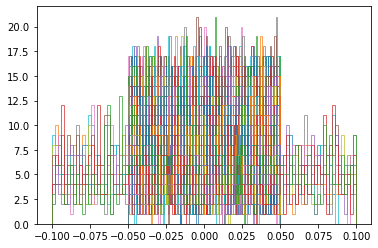

In [8]:
import numpy as np
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255, x_test/255

# 3. tf.keras.initializers.RandomNormal 사용하기
initializer1 = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
initializer2 = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, use_bias = False, kernel_initializer=initializer1),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=False, kernel_initializer=initializer2)
])

# 4. 시냅스 가중치 출력
weights = model.get_weights()
print(weights)

# 6. Matplotlib 시각화 하기
import matplotlib.pyplot as plt

plt.hist(weights[0], bins = 100, alpha = 0.7, histtype='step')
plt.hist(weights[1], bins = 100, alpha = 0.7, histtype='step')

tf.keras.initializers.RandomUniform의 minval, maxval은 균등분포의 범위를 지정합니다.

각각 최소 -0.05, 최대 0.05, 그리고 최소 -0.1, 최대 0.1범위를 갖는 임의의 시냅스 가중치가 생성되었음을 알 수 있습니다.